In [109]:
import numpy as np
from numpy import genfromtxt
import random
import pandas as pd
import matplotlib.pyplot as plt


In [110]:
###Function te update params
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = len(points)
    for i in range(N):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N)*(y- (m_current*x + b_current) )
        m_gradient += -(2/N)*x*(y-(m_current*x + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [111]:
def gradient_descent_runner(points, start_b, start_m, learningRate, num_iterations):
    
    b = start_b
    m = start_m
    colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    for i in range(num_iterations):
        x = [points[i][0] for i in range(len(points))]
        y = [points[i][1] for i in range(len(points))]
        plt.scatter(x,y)

        b,m = step_gradient(b, m, np.array(points), learningRate)
        if(i%100 == 0):
#             print(i)            
            y1 = [((m*points[i][0])+b) for i in range(len(points))]
            plt.plot(x,y1,color=random.choice(colors))
    plt.show()
    return [m,b]

In [112]:
def cost_func(m,b,points):
    totalCost = 0
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        totalCost += ( y - (m*x + b) )**2
    return totalCost/len(points)

In [113]:
def run():
    points = genfromtxt("https://lookaside.fbsbx.com/file/data.csv?token=AWx6ttRYNxAG00d2IsU9mqpkY0ELcYVO-4lvlCKy6i5QJ2-olXEKsZpKH6y5zwEEj23gqajqx02JPELg5bzxopqG0aYKxaLKOEcJz2Hv6j8vdo0FKqIH-DIzZT1nveV9btH0zYI7u-hrFwxicjHR9pG6yWOSaql8359o-5zHJjT60n90A48Aeqj5vj_lCBNVvBY",delimiter = ',')
    learningRate = 0.0001
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    print(cost_func(initial_m, initial_b, points))
    final_m, final_b = gradient_descent_runner(points, initial_b, initial_m, learningRate, num_iterations)
    print(cost_func(final_m, final_b, points))
    print(final_m , final_b)
    return final_m, final_b
    

5565.10783448


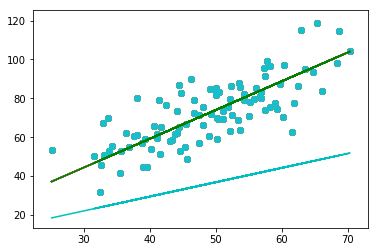

112.614810116
1.47774408519 0.0889365199374


In [114]:
fm,fb=run()

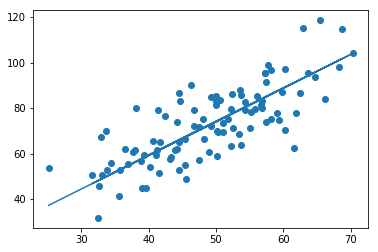

In [115]:
import matplotlib.pyplot as plt

points=genfromtxt("https://lookaside.fbsbx.com/file/data.csv?token=AWx6ttRYNxAG00d2IsU9mqpkY0ELcYVO-4lvlCKy6i5QJ2-olXEKsZpKH6y5zwEEj23gqajqx02JPELg5bzxopqG0aYKxaLKOEcJz2Hv6j8vdo0FKqIH-DIzZT1nveV9btH0zYI7u-hrFwxicjHR9pG6yWOSaql8359o-5zHJjT60n90A48Aeqj5vj_lCBNVvBY", delimiter=',')
x=[points[i][0] for i in range(len(points))]
y=[points[i][1] for i in range(len(points))]
y1=[((fm*points[i][0])+fb)for i in range (len(points))]
plt.scatter(x,y)
plt.plot(x,y1)
plt.show()
